In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Coditas\Desktop\Projects\Cauti\silver\silver_dataset.csv")

In [16]:
# Separate target
target = "y"
features = df.drop(columns=[target])

# Pearson correlation with y
corr_with_y = df.corr()[target].drop(target).sort_values(key=abs, ascending=False)

corr_with_y

other_uti_present                                 0.152658
recurrent_uti                                     0.147576
other_uti_uti_unspecified                         0.147528
urinalysis_wbc                                    0.126717
neurogenic_bladder                                0.105307
                                                    ...   
discharge_location_home_health_care              -0.000621
admission_location_information_not_available     -0.000426
discharge_location_acute_hospital                -0.000397
admission_location_ambulatory_surgery_transfer   -0.000327
discharge_location_against_advice                -0.000303
Name: y, Length: 117, dtype: float64

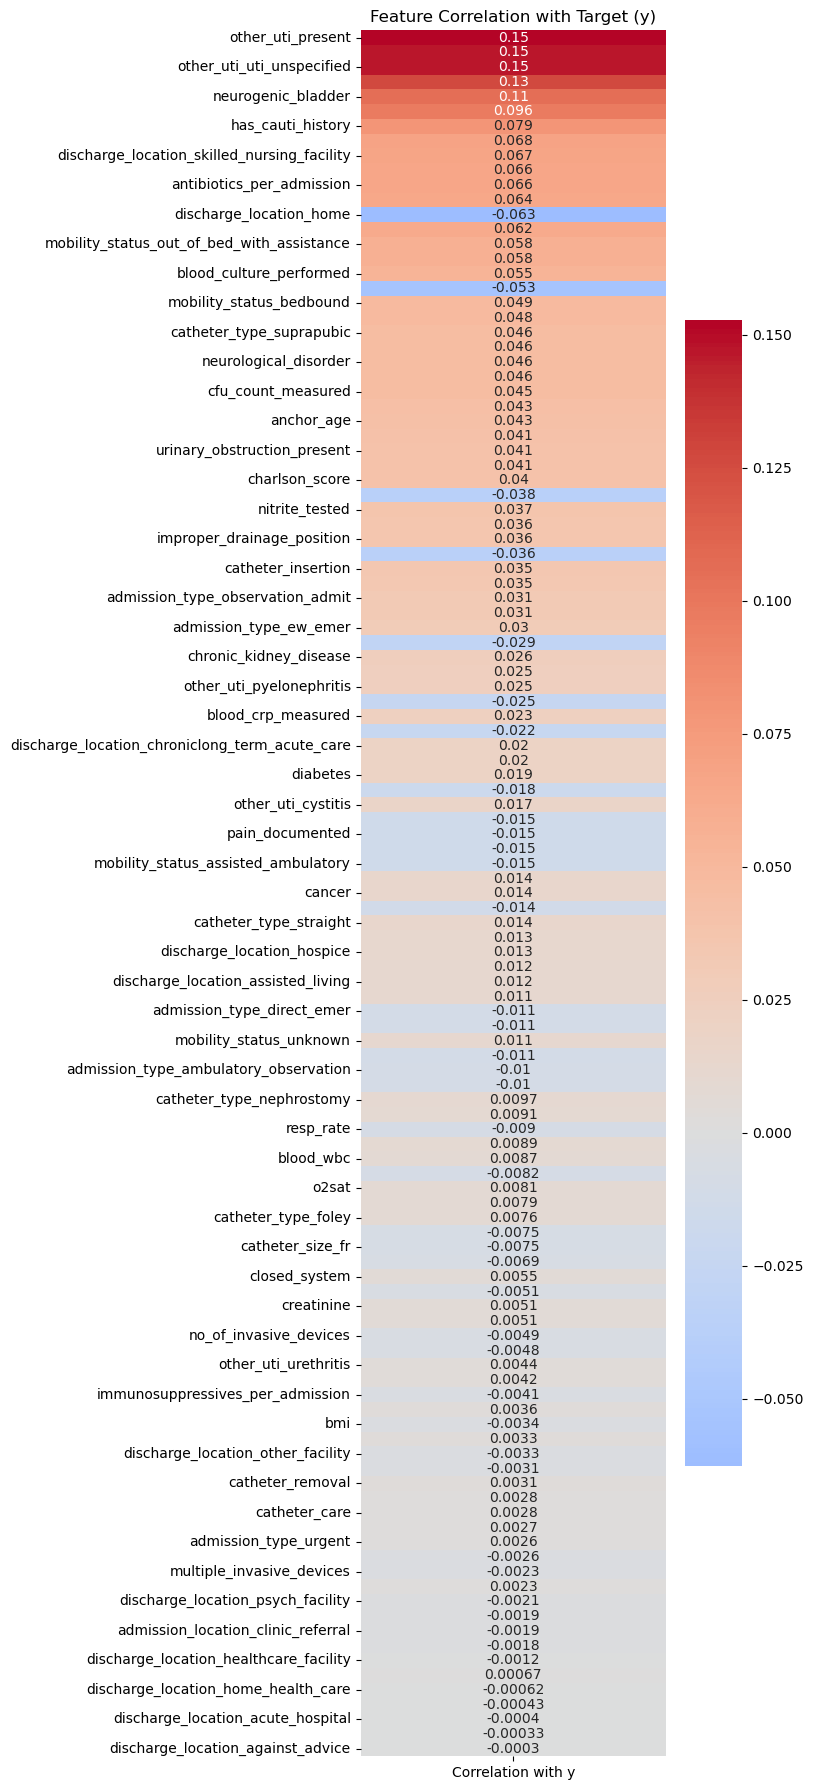

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 18))
sns.heatmap(
    corr_with_y.to_frame(name="Correlation with y"),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation with Target (y)")
plt.tight_layout()

# ✅ Save image
plt.savefig("feature_correlation_with_y.png", dpi=300, bbox_inches="tight")
plt.show()

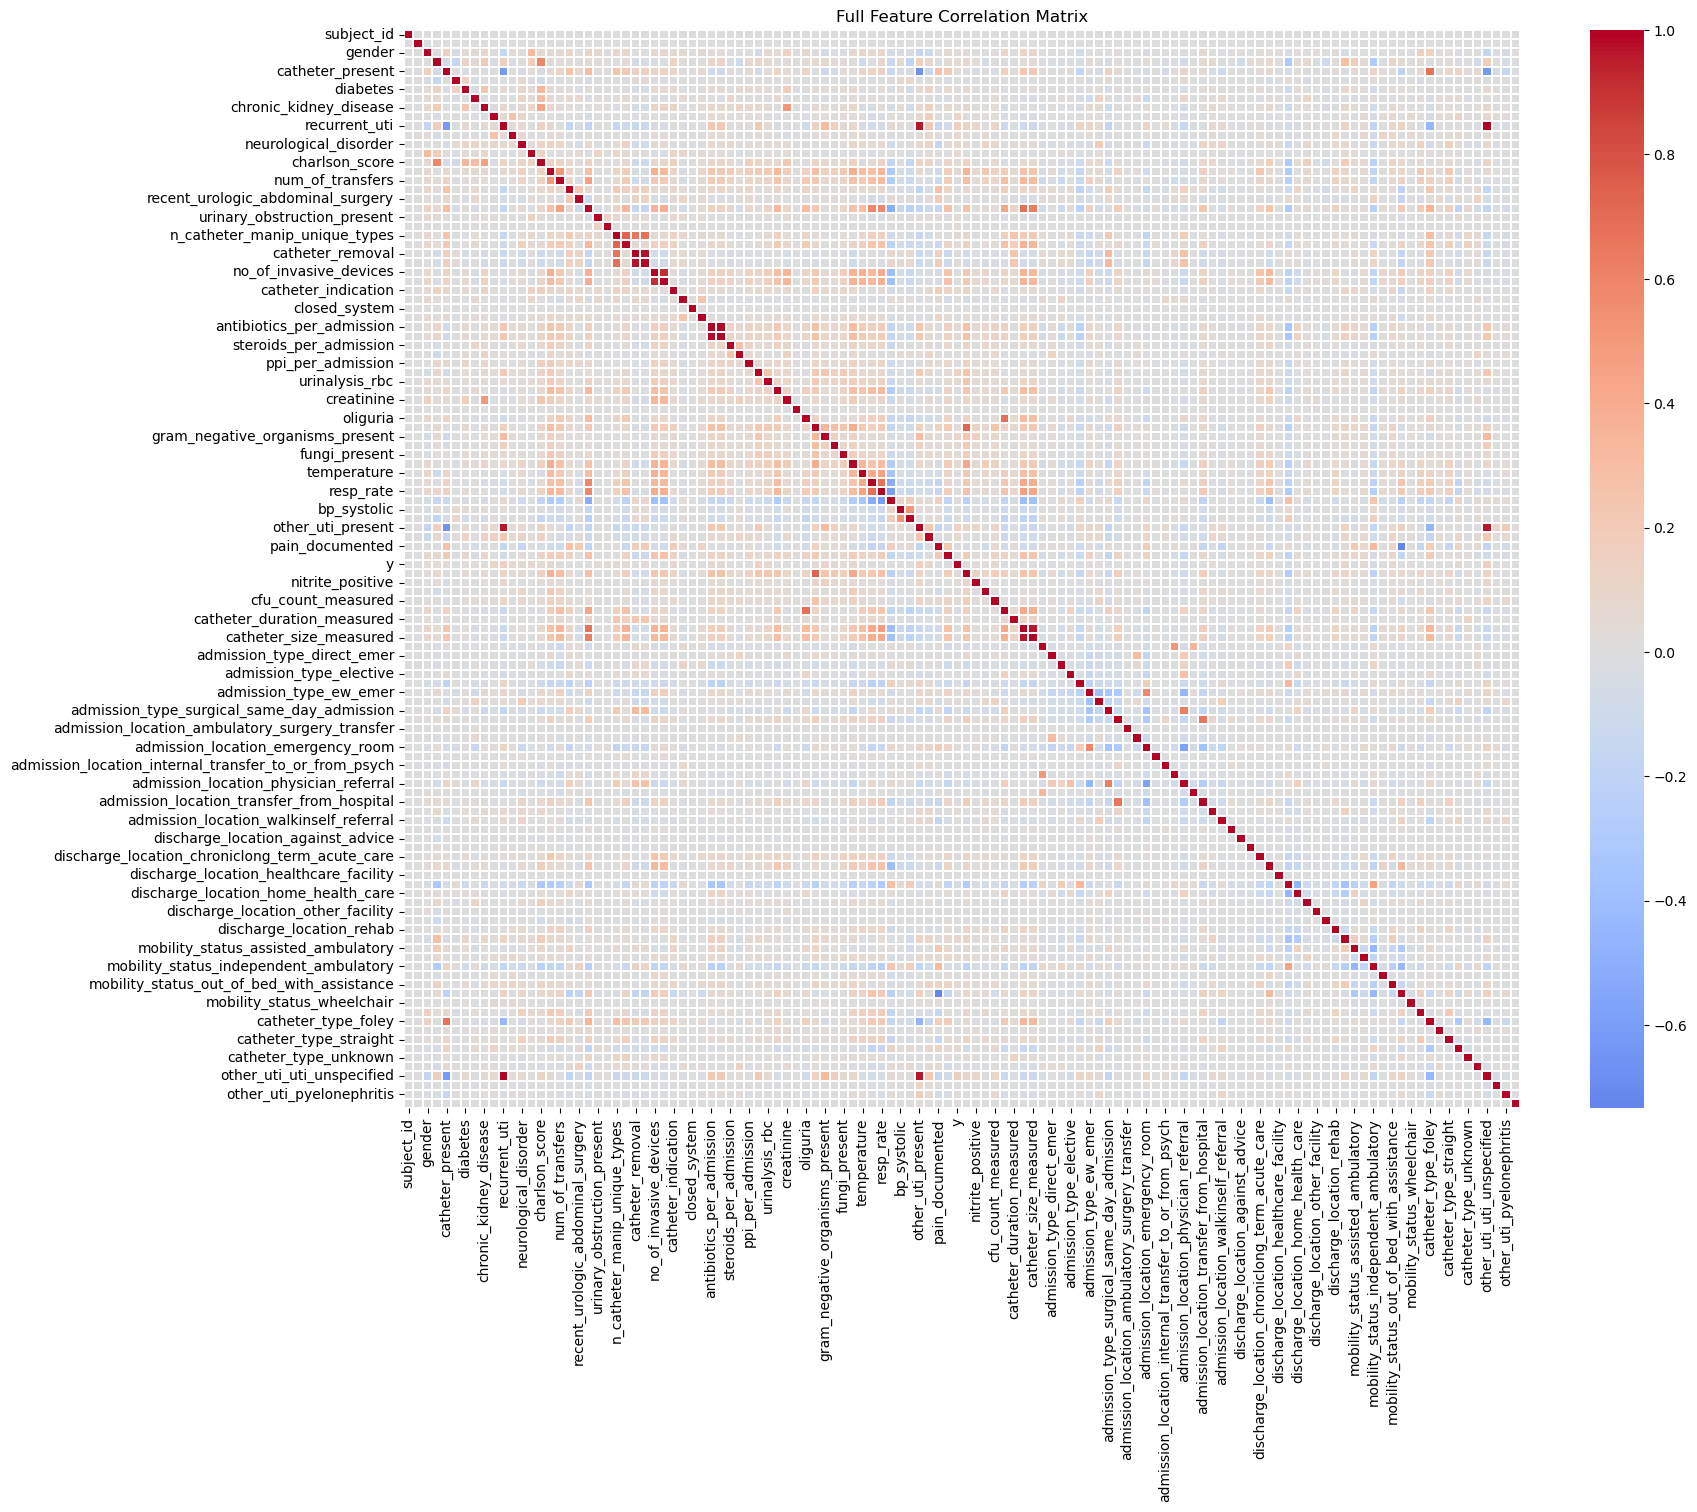

In [18]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.1
)
plt.title("Full Feature Correlation Matrix")
plt.show()


In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = features
y = df[target]

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

# Raw importance (sums to 1)
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

# Convert to percentage
feature_importance_df = (
    feature_importance
    .mul(100)  # convert to %
    .reset_index()
)

feature_importance_df.columns = ["feature", "importance_percent"]

# Save to CSV (no scientific notation)
feature_importance_df.to_csv(
    "feature_importance_percentage.csv",
    index=False,
    float_format="%.4f"   # e.g. 13.5312 %
)


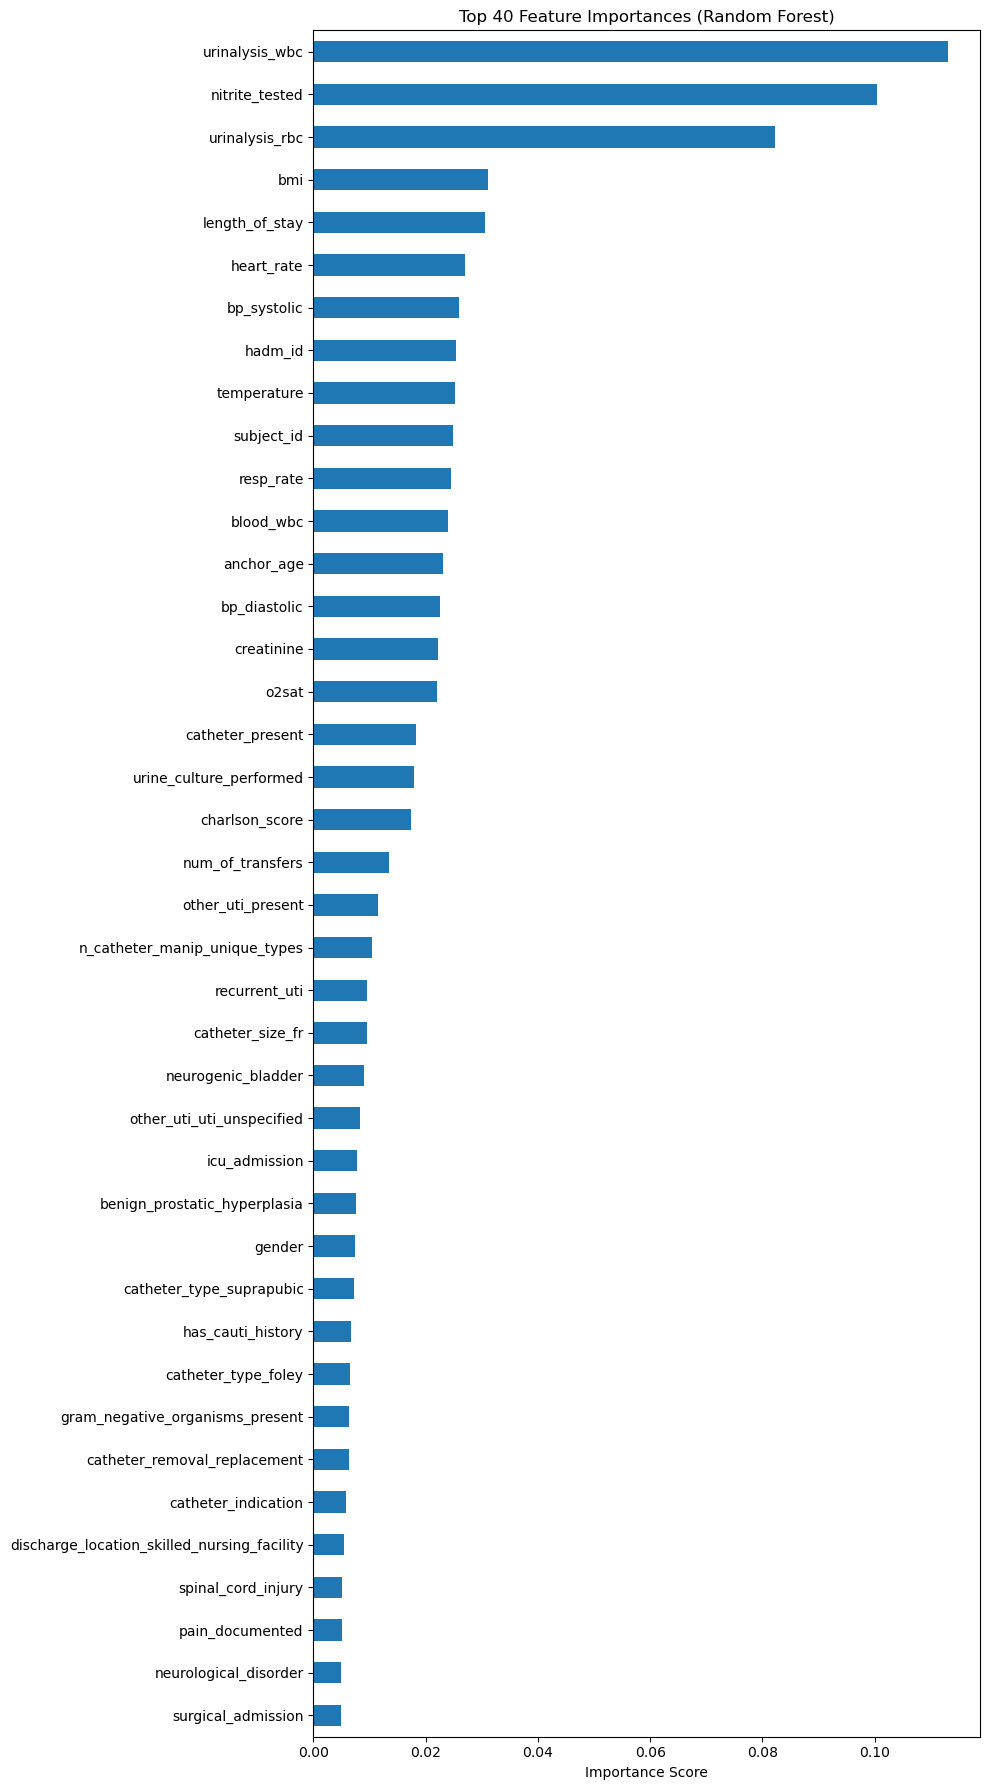

In [20]:
plt.figure(figsize=(10, 18))
feature_importance.head(40).sort_values().plot(
    kind="barh"
)
plt.title("Top 40 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
